In [6]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Memuat data dari jalur yang benar
data_path = '/content/drive/MyDrive/Dataset/datacar.csv'
data = pd.read_csv(data_path)

# Pilih fitur dan variabel target yang relevan, dan hapus baris dengan nilai yang hilang di kolom-kolom ini
data = data[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']].dropna()

In [8]:
# Tentukan matriks fitur X dan variabel target y
X = data[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']]
y = data['MSRP']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Menghitung metrik performa untuk kedua model
results = {
    "Linear Regression": {
        "MSE": mean_squared_error(y_test, y_pred_linear),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        "R^2": r2_score(y_test, y_pred_linear)
    },
    "Polynomial Regression (Degree 2)": {
        "MSE": mean_squared_error(y_test, y_pred_poly),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        "R^2": r2_score(y_test, y_pred_poly)
    }
}

# Menampilkan hasil
print("Comparison of Linear and Polynomial Regression:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")

Comparison of Linear and Polynomial Regression:

Linear Regression:
  MSE: 1709414770.06
  RMSE: 41345.07
  R^2: 0.46

Polynomial Regression (Degree 2):
  MSE: 1265288331.96
  RMSE: 35570.89
  R^2: 0.60


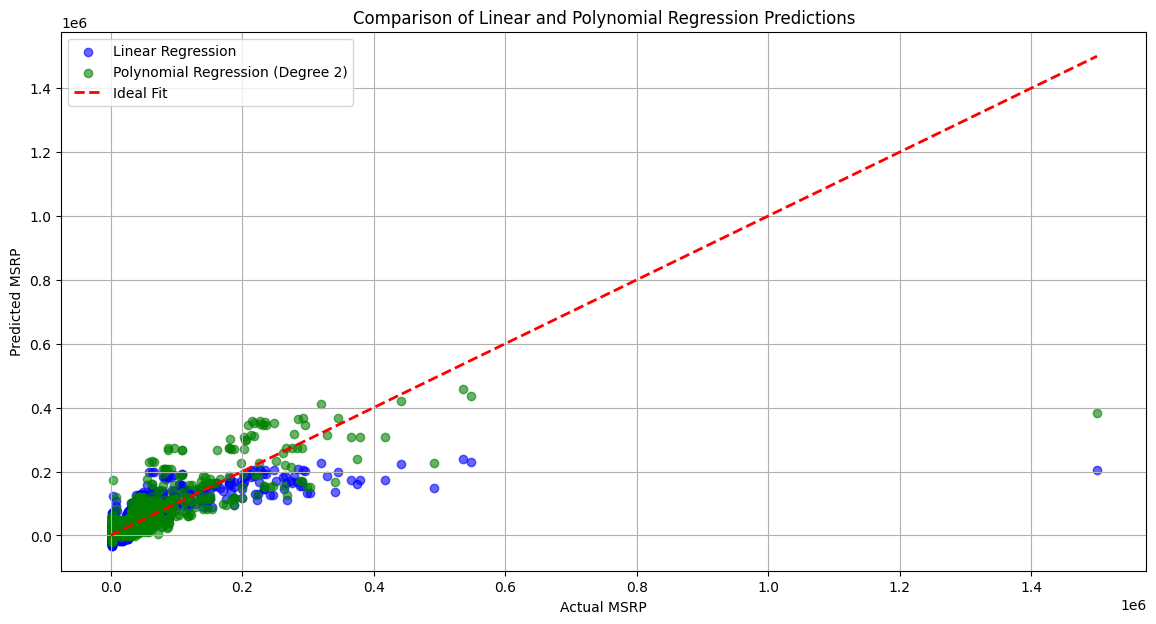

In [10]:
# Regresi Linier Biasa
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

# Regresi Polinomial (Model fungsi basis dengan derajat 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_reg = make_pipeline(poly, StandardScaler(), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

# Membuat plot model regresi
plt.figure(figsize=(14, 7))

# Plot sebaran nilai aktual vs nilai prediksi
plt.scatter(y_test, y_pred_linear, color="blue", label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_poly, color="green", label="Polynomial Regression (Degree 2)", alpha=0.6)

# Plot garis yang ideal untuk referensi
max_val = max(max(y_test), max(y_pred_linear), max(y_pred_poly))
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--", linewidth=2, label="Ideal Fit")

# Mengatur label dan judul
plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Comparison of Linear and Polynomial Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()